In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw
Processing...


C:\Users\rhz_3\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x23D81FB77F0>, 5)

***Viewing images***

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline # Magic command to show image in this notebook not as a pop up

*There are more magic command available in iphython website*

Label:  5


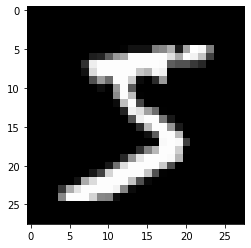

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

***Converting images to tensors***

In [8]:
import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


*Image tensor here is 3 dimensional. First dimension is for color (only 1, greyscale here), other two are pixels*

In [12]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


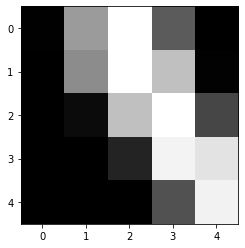

In [13]:
#Ploting image using matplotlib
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray') # we drop the first dimension because matplot considers color channel
                                                        # in the last dimension or none while pytorch keep color as first dim

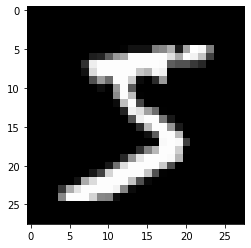

In [14]:
plt.imshow(img_tensor[0, :, :], cmap='gray')

***Train and Validation Datasets***

In [16]:
import numpy as np

# Getting random val_pct percent of indices from n indices
def split_indices(n, val_pct):
    # Determining validation set size
    n_val = int(val_pct*n)
    # Createing random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [17]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [18]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [51409 25655 21468 46924 36334 36493 20348 19544 15224 57400 11002 28801
 20833  3225 59313  6533 31934 27887  1858 11468]


In [19]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [20]:
batch_size = 100

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

***Model Declaration***

## Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [21]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

#logistic regression is similar to linear so we use nn.Linear here
model = nn.Linear(input_size, num_classes)

In [22]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0215, -0.0264,  0.0201,  ..., -0.0246,  0.0107,  0.0187],
        [ 0.0179, -0.0341,  0.0103,  ...,  0.0133,  0.0095,  0.0315],
        [-0.0355, -0.0095, -0.0267,  ...,  0.0084, -0.0103, -0.0325],
        ...,
        [ 0.0257,  0.0013,  0.0311,  ..., -0.0239, -0.0007,  0.0255],
        [ 0.0082,  0.0147,  0.0330,  ..., -0.0008,  0.0269,  0.0135],
        [-0.0205,  0.0299,  0.0279,  ...,  0.0172,  0.0233,  0.0021]],
       requires_grad=True)


In [24]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([ 0.0144,  0.0219,  0.0018, -0.0129,  0.0263,  0.0004,  0.0341, -0.0151,
        -0.0067, -0.0206], requires_grad=True)


***visualizing some outputs from the model***

In [27]:
# Viewing the first batch
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([5, 0, 9, 5, 2, 8, 7, 3, 6, 5, 3, 7, 8, 6, 5, 3, 3, 3, 8, 6, 6, 2, 2, 7,
        7, 8, 0, 9, 9, 3, 6, 0, 1, 6, 2, 5, 5, 4, 0, 1, 9, 4, 9, 6, 7, 1, 6, 1,
        3, 2, 9, 6, 2, 7, 1, 3, 1, 4, 9, 1, 9, 3, 1, 1, 1, 2, 7, 0, 9, 5, 2, 1,
        2, 7, 0, 4, 0, 7, 9, 4, 3, 7, 0, 2, 4, 1, 3, 5, 7, 9, 3, 2, 8, 2, 8, 6,
        4, 1, 8, 3])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

*Received error because the model expects a vetor of 28X28 = 784 items, not a matrix,  so wee need to flatten out image using .reshape method*

In [28]:
# we extend nn.Module class for reshape functionality
# We declare a new model with reshape functionality

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [31]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0292, -0.0079, -0.0327,  ..., -0.0190,  0.0285, -0.0330],
         [ 0.0198, -0.0153,  0.0002,  ...,  0.0177, -0.0064,  0.0230],
         [ 0.0029, -0.0132,  0.0131,  ...,  0.0115,  0.0305,  0.0011],
         ...,
         [ 0.0177, -0.0131,  0.0347,  ..., -0.0162,  0.0089, -0.0002],
         [-0.0322,  0.0161,  0.0200,  ..., -0.0317, -0.0267,  0.0268],
         [-0.0195, -0.0033,  0.0253,  ...,  0.0302, -0.0283, -0.0152]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0034,  0.0203, -0.0115,  0.0169,  0.0272,  0.0343, -0.0154,  0.0199,
         -0.0189, -0.0128], requires_grad=True)]

In [32]:
for images, labels in train_loader:
    outputs = model(images)
    break

In [33]:
print('outputs.shape: ', outputs.shape)
print('Sample outputs: ', outputs[:2].data)

outputs.shape:  torch.Size([100, 10])
Sample outputs:  tensor([[ 0.1537,  0.0301,  0.0804, -0.1800, -0.4741,  0.0802,  0.1908, -0.3212,
          0.2104,  0.3447],
        [-0.0687, -0.0558,  0.1862,  0.2846, -0.2213,  0.0888,  0.2844, -0.1735,
          0.3916, -0.1572]])


In [34]:
import torch.nn.functional as F

In [37]:
# Applying softmax for each output row
probs = F.softmax(outputs, dim=1)

# Displaying the sample probabilites
print('Sample probabilities: \n', probs[:2].data)

# Adding up the probabilities of an output row
print('Sum: ', torch.sum(probs[0]).item())

# Getting max probability
print('Max: ', torch.max(probs[0]).item())

Sample probabilities: 
 tensor([[0.1121, 0.0991, 0.1042, 0.0803, 0.0598, 0.1042, 0.1163, 0.0697, 0.1186,
         0.1357],
        [0.0864, 0.0875, 0.1114, 0.1229, 0.0741, 0.1011, 0.1229, 0.0778, 0.1368,
         0.0790]])
Sum:  1.0
Max:  0.13568484783172607


In [38]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 8, 2, 9, 5, 6, 8, 8, 1, 6, 1, 6, 1, 2, 6, 6, 0, 6, 1, 8, 2, 6, 6, 8,
        2, 1, 6, 2, 9, 2, 6, 9, 2, 9, 6, 9, 6, 6, 6, 6, 6, 6, 6, 1, 9, 2, 8, 1,
        1, 2, 2, 9, 8, 6, 6, 2, 2, 6, 6, 6, 6, 2, 1, 8, 1, 2, 6, 6, 6, 6, 6, 9,
        9, 6, 9, 0, 6, 8, 3, 6, 8, 2, 6, 6, 2, 6, 6, 6, 6, 2, 6, 8, 1, 6, 6, 9,
        6, 6, 6, 8])
tensor([0.1357, 0.1368, 0.1447, 0.1171, 0.1209, 0.1299, 0.1420, 0.1363, 0.1272,
        0.1134, 0.1353, 0.1167, 0.1407, 0.1344, 0.1290, 0.1445, 0.1176, 0.1607,
        0.1389, 0.1544, 0.1266, 0.1458, 0.1367, 0.1165, 0.1331, 0.1418, 0.1348,
        0.1518, 0.1468, 0.1550, 0.1508, 0.1332, 0.1333, 0.1264, 0.1426, 0.1246,
        0.1225, 0.1420, 0.1378, 0.1302, 0.1538, 0.1134, 0.1437, 0.1451, 0.1635,
        0.1291, 0.1369, 0.1233, 0.1321, 0.1479, 0.1332, 0.1260, 0.1308, 0.1480,
        0.1370, 0.1463, 0.1449, 0.1329, 0.1388, 0.1315, 0.1423, 0.1307, 0.1325,
        0.1485, 0.1357, 0.1149, 0.1445, 0.1306, 0.1479, 0.1379, 0.1273, 0.1394,
        0.1283, 0.1

In [39]:
labels

tensor([0, 9, 8, 6, 5, 0, 7, 7, 3, 3, 5, 2, 8, 0, 3, 9, 1, 5, 5, 7, 8, 6, 3, 7,
        6, 5, 0, 7, 8, 2, 8, 9, 9, 5, 1, 4, 8, 3, 2, 5, 6, 5, 6, 6, 0, 9, 1, 5,
        6, 7, 3, 8, 1, 0, 2, 4, 7, 1, 2, 1, 2, 6, 5, 7, 5, 6, 6, 1, 5, 9, 1, 0,
        3, 9, 5, 7, 8, 3, 9, 9, 9, 5, 8, 1, 9, 3, 1, 6, 2, 7, 6, 7, 0, 9, 2, 9,
        1, 8, 1, 9])